In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC

import numpy as np
from tensorflow import keras

Load and preprocess datasets

In [10]:
(train_images_1, train_labels_1), (test_images_1, test_labels_1) = keras.datasets.mnist.load_data()
num_img = 1000

# reshape images from 3D array to 2D array so that SVC can process it
samples_1, x_1, y_1 = train_images_1.shape # originally (60000, 28, 28)
train_images_1 = train_images_1.reshape((samples_1, x_1*y_1)) # reshaped to (60000, 784)
train_images_1 = train_images_1[:num_img, :] # to (num_img, 784)

# # normalize inputs
# train_images_1 = (train_images_1/255)-0.5

train_labels_1 = train_labels_1[:num_img] # from (60000, 1) to (num_img, 1)
train_labels_1 = train_labels_1.ravel() # from (num_img, 1) to (num_img,)


samples_1, x_1, y_1 = test_images_1.shape # originally (10000, 28, 28)
test_images_1 = test_images_1.reshape((samples_1, x_1*y_1)) # reshaped to (10000, 784)
test_images_1 = test_images_1[:num_img, :] # to (num_img, 784)

# # normalize inputs
# test_images_1 = (test_images_1/255)-0.5

test_labels_1 = test_labels_1[:num_img] # from (60000, 1) to (num_img, 1)
test_labels_1 = test_labels_1.ravel() # from (num_img, 1) to (num_img,)


In [11]:
(train_images_2, train_labels_2), (test_images_2, test_labels_2) = keras.datasets.cifar10.load_data()
num_img = 1000

# reshape images from 3D array to 2D array so that SVC can process it
samples_2, x_2, y_2, c_2 = train_images_2.shape # originally (50000, 32, 32, 3)
train_images_2 = train_images_2.reshape((samples_2, x_2*y_2*c_2)) # reshaped to (50000, 3072)
train_images_2 = train_images_2[:num_img, :] # to (num_img, 3072)

# # normalize inputs
# train_images_2 = (train_images_2/255)-0.5

train_labels_2 = train_labels_2[:num_img] # from (50000, 1) to (num_img, 1)
train_labels_2 = train_labels_2.ravel() # from (num_img, 1) to (num_img,)

samples_2, x_2, y_2, c_2 = test_images_2.shape # originally (10000, 32, 32)
test_images_2 = test_images_2.reshape((samples_2, x_2*y_2*c_2)) # reshaped to (10000, 3072)
test_images_2 = test_images_2[:num_img, :] # to (num_img, 3072)

# # normalize inputs
# test_images_2 = (test_images_2/255)-0.5

test_labels_2 = test_labels_2[:num_img] # from (num_img00,1) to (num_img,1)
test_labels_2 = test_labels_2.ravel() # from (num_img, 1) to (num_img,)

In [12]:
# Kernels
linear_kernel = LinearSVC(dual=False)

poly_kernel = SVC(C=1.0, kernel='poly', degree=3, gamma=2, max_iter = 1)

rbf_kernel = SVC(kernel='rbf')

sigmoid_kernel = SVC(kernel='sigmoid')

In [13]:
list_acc = []
list_train_time = []

data_tuple = [(train_images_1, train_labels_1, test_images_1, test_labels_1), (train_images_2, train_labels_2, test_images_2, test_labels_2) ]

rounding_num = 4

for svm in [linear_kernel, poly_kernel, rbf_kernel, sigmoid_kernel]:
    list_acc_for_one_ds = []
    list_train_time_for_one_ds = []

    for img_train, lab_train, img_test, lab_test in data_tuple:
        
        # measuring when training time starts
        start = time.time()

        ## TRAIN SVM
        svm.fit(img_train, lab_train)
        
        # measuring when training time stops
        stop = time.time()
        # print(f"Training time for {svm.name, dataset.name}: {stop - start}s")
        train_time = stop - start
        train_time = round(train_time, rounding_num)
        list_train_time_for_one_ds.append(train_time)

        # compare whether the svm predicted the right target/label for the test dataset
        pred_test = svm.predict(img_test)
        acc = accuracy_score(lab_test, pred_test, normalize=True)

        # round up the number until the 2nd decimal number
        acc = round(acc, rounding_num) 

        # append the accuracy to the list of accuracy for one dataset
        list_acc_for_one_ds.append(acc)
    

    # append the list of accuracies for one dataset to the list of accuracies for the all 3 datasets
    # for example, the first list inside the list_acc is the accuracies of the dataset1
    list_acc.append(list_acc_for_one_ds)   
    list_train_time.append(list_train_time_for_one_ds) 


C:\Users\prizl\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\prizl\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [16]:
df_perform = pd.DataFrame(list_acc, index = ['linear kernel', 'polynomial kernel','RBF kernel', 'sigmoid kernel'], 
                                    columns= ['MNIST', 'CIFAR-10'])
df_time = pd.DataFrame(list_train_time, index = ['linear kernel', 'polynomial kernel','RBF kernel', 'sigmoid kernel'], 
                                    columns= ['MNIST', 'CIFAR-10'])

df_time

,MNIST,CIFAR-10
linear kernel,0.1023,23.1966
polynomial kernel,0.0354,0.0530
RBF kernel,0.1770,2.3904
sigmoid kernel,0.1450,2.5445


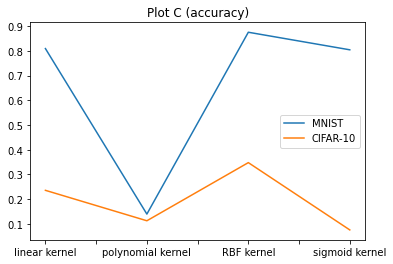

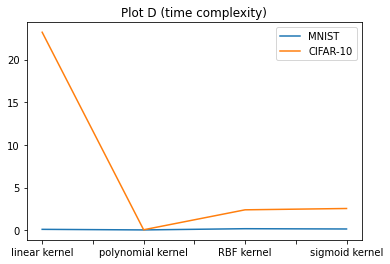

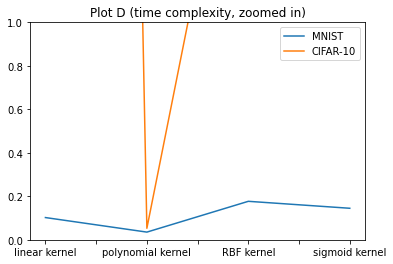

In [19]:
plot_c = df_perform.plot(title="Plot C (accuracy)")
plot_c=plot_c.figure
plot_c.savefig(f'image/plot_c.jpg')

plot_d_1 = df_time.plot(title="Plot D (time complexity)")
plot_d_1=plot_d_1.figure
plot_d_1.savefig(f'image/plot_d_1.jpg')

plot_d_2 = df_time.plot(title="Plot D (time complexity, zoomed in)")
plot_d_2.set_ylim(0,1) # disregarding the outlier which was too high
plot_d_2=plot_d_2.figure
plot_d_2.savefig(f'image/plot_d_2.jpg')